<a href="https://colab.research.google.com/github/GuillermoFidalgo/ICOM6015/blob/main/AE_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Warning !!!

This code consumes a lot of RAM (>10GB) and at least 2GB of disk space for the data (not all is in use here).
I would not recommend running locally unless you have at least 16 GB of RAM.
(I think if it goes over this quantity some of the memory is stored on disk which might allow for the code to keep running)

This code was intented to be run on Google Colab, but if you run out of memory in the pre-processing stage I would run locally only if you have enough ram and disk space

# Initial Setup

This only needs to be run once.
Sadly with Google Colab the quickest way to get a new package working after a `pip install` is to restart the kernel.
So for the first time click on `Runtime` and then click on `Restart runtime`

In [ ]:
# this is only needed for styling, so if you want need fancy plots you can skip this step
! pip install mplhep

     |████████████████████████████████| 11.2 MB 7.9 MB/s 
     |████████████████████████████████| 5.8 MB 18.4 MB/s 
     |████████████████████████████████| 884 kB 60.1 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import mplhep as hep

Now you should specify below the place where you have your data stored.
In my case I have it in my google drive folder `Neural Networks`.
***Change this as needed to your google driver folder.***

In [ ]:
from google.colab import drive
drive.mount('gdrive')
%cd "gdrive/MyDrive/UPRM/Graduate Docs/Neural Networks"

Mounted at gdrive
/content/gdrive/MyDrive/UPRM/Graduate Docs/Neural Networks


If everything is done correctly you should be able to list the data files (We will only use a subset)

There is a lot of data available and if you want to use the source it will need some processing in order to add the labels column. Because this is time consuming and computationally expensive I have not included that code in this notebook. I will store it under the `utils.py` file just if you want to see it.

The code used to create pickle file that contains the all of the source data needed with the labels in a file called `Data_with_labels.pkl` that is over 1 GB of disk space.

In [ ]:
! pwd
! ls -lah ML_downloads/


/Users/guillermofidalgo/Documents/Scripts/python_scripts/NN Project
total 3946952
drwxr-xr-x@ 18 guillermofidalgo  staff   576B Nov 30 23:02 .
drwxr-xr-x  13 guillermofidalgo  staff   416B Dec  9 16:08 ..
-rw-rw-rw-@  1 guillermofidalgo  staff   128M Nov 30 23:01 DF2017_chargeInner_PXLayer_1.csv
-rw-rw-rw-@  1 guillermofidalgo  staff   128M Nov 30 23:00 DF2017_chargeInner_PXLayer_2.csv
-rw-rw-rw-@  1 guillermofidalgo  staff   126M Nov 30 23:00 DF2017_chargeInner_PXLayer_3.csv
-rw-rw-rw-@  1 guillermofidalgo  staff   124M Nov 30 23:00 DF2017_chargeInner_PXLayer_4.csv
-rw-rw-rw-@  1 guillermofidalgo  staff   129M Nov 30 23:01 DF2017_chargeOuter_PXLayer_1.csv
-rw-rw-rw-@  1 guillermofidalgo  staff   127M Nov 30 23:01 DF2017_chargeOuter_PXLayer_2.csv
-rw-rw-rw-@  1 guillermofidalgo  staff   126M Nov 30 23:01 DF2017_chargeOuter_PXLayer_3.csv
-rw-rw-rw-@  1 guillermofidalgo  staff   125M Nov 30 23:00 DF2017_chargeOuter_PXLayer_4.csv
-rw-rw-rw-@  1 guillermofidalgo  staff   121M Nov 30 22:58 

#  Code Starts Here

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import json
from sklearn.preprocessing import normalize
hep.style.use("CMS")
import pickle

## Get the data

In [ ]:
# Loading in > 1GB of data
DF_dict = pickle.load(open("ML_downloads/Data_with_labels.pkl",'rb'))

In [ ]:
Golden_Json = json.load(open("ML_downloads/golden_UL_2017.json"))

All histograms share the same attributes

In [ ]:
DF_dict["ChargePXDisk_p1"].nunique()

fromrun          599
fromlumi        3001
hname              1
fromrun.1        599
fromlumi.1      3001
metype             1
hname.1            1
histo         216045
entries       104846
Xmax               1
Xmin               1
Xbins              1
Ymax               1
Ymin               1
Ybins              1
Labels             2
dtype: int64

We can very confidently drop the columns that have `.1` at the end.
This is a product of the processing when creating these files

In [ ]:
for df_key,df in DF_dict.items():
    df.drop(["fromrun.1","fromlumi.1","metype","hname.1"],axis=1,inplace=True)
    df.reset_index(drop=True,inplace=True)

Now we see that all the dataframes have been reduced, so let's see the dtypes of each column


In [ ]:
DF_dict['ChargePXDisk_p2'].convert_dtypes().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   fromrun   225954 non-null  Int64  
 1   fromlumi  225954 non-null  Int64  
 2   hname     225954 non-null  string 
 3   histo     225954 non-null  string 
 4   entries   225954 non-null  Int64  
 5   Xmax      225954 non-null  Int64  
 6   Xmin      225954 non-null  Int64  
 7   Xbins     225954 non-null  Int64  
 8   Ymax      225954 non-null  Int64  
 9   Ymin      225954 non-null  Int64  
 10  Ybins     225954 non-null  Int64  
 11  Labels    225954 non-null  boolean
dtypes: Int64(9), boolean(1), string(2)
memory usage: 21.3 MB


The `histo` column contains the list of the raw histogram values for each bin. This is no good to us as a string. Let's extract the information contained in the Dataframes with the following function.

In [ ]:
def get_hist_values(df):
    ### same as builtin "df['histo'].values" but convert strings to np arrays
    # input arguments:
    # - df: a dataframe containing histograms (assumed to be of a single type!)
    # note: this function works for both 1D and 2D histograms,
    #       the distinction is made based on whether or not 'Ybins' is present as a column in the dataframe
    
    #       'Ybins' is also present for 1D histograms, but has value 1!
    
    # output:
    # a tuple containing the following elements:
    # - np array of shape (nhists,nbins) (for 1D) or (nhists,nybins,nxbins) (for 2D)
    # - np array of run numbers of length nhists
    # - np array of lumisection numbers of length nhists
    # warning: no check is done to assure that all histograms are of the same type!
    dim = 1
    # if 'Ybins' in df.keys():
    #     if df.at[0,'Ybins']>1: dim=2
    nxbins = df.iat[0,7] +2 # +2 for under and overflow bins
    
    vals = np.zeros((len(df),nxbins))
    # if dim==2: 
    #     nybins = df.at[0,'Ybins']+2
    #     vals = np.zeros((len(df),nybins,nxbins))
    ls = np.zeros(len(df))
    runs = np.zeros(len(df))
    for i in range(len(df)):
        hist = np.array(json.loads(df.iat[i,3]))
        # if dim==2: hist = hist.reshape((nybins,nxbins))
        vals[i,:] = hist
        ls[i] = int(df.iat[i,1])
        runs[i] = int(df.iat[i,0])
    ls = ls.astype(int)
    runs = runs.astype(int)
    return (vals,runs,ls)


This will take around 2 mins to run. 

In [ ]:
def train_testDf(df,df_keys):
    df_train,df_test = {},{}
    for h in df_keys:
        df_train[h]=df[h].loc[df[h]['Labels']==True]
        df_test[h]=df[h].loc[df[h]['Labels']==False]
    return df_train,df_test

In [ ]:
df_train,df_test = train_testDf(DF_dict,DF_dict.keys())

In [ ]:
df_train['ChargePXDisk_p1']

,fromrun,fromlumi,hname,histo,entries,Xmax,Xmin,Xbins,Ymax,Ymin,Ybins,Labels
69,297050,12,charge_PXDisk_+1,"[0, 0, 0, 0, 2, 46, 76, 97, 91, 89, 90, 98, 10...",115230,80000.0,0.0,100,1,0,1,True
70,297050,13,charge_PXDisk_+1,"[0, 0, 0, 0, 0, 63, 72, 88, 84, 91, 84, 91, 10...",109222,80000.0,0.0,100,1,0,1,True
71,297050,14,charge_PXDisk_+1,"[0, 0, 0, 0, 1, 60, 79, 83, 87, 89, 82, 75, 10...",106074,80000.0,0.0,100,1,0,1,True
72,297050,15,charge_PXDisk_+1,"[0, 0, 0, 0, 0, 52, 85, 90, 89, 109, 84, 94, 1...",111786,80000.0,0.0,100,1,0,1,True
73,297050,16,charge_PXDisk_+1,"[0, 0, 0, 0, 0, 64, 78, 82, 72, 81, 89, 83, 94...",111181,80000.0,0.0,100,1,0,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...
225809,306460,60,charge_PXDisk_+1,"[0, 0, 0, 0, 0, 7, 21, 25, 59, 80, 101, 141, 1...",6241,80000.0,0.0,100,1,0,1,True
225810,306460,61,charge_PXDisk_+1,"[0, 0, 0, 0, 0, 8, 31, 30, 62, 86, 102, 146, 1...",6112,80000.0,0.0,100,1,0,1,True
225811,306460,62,charge_PXDisk_+1,"[0, 0, 0, 0, 0, 11, 17, 36, 63, 79, 98, 122, 1...",5868,80000.0,0.0,100,1,0,1,True
225812,306460,63,charge_PXDisk_+1,"[0, 0, 0, 0, 0, 5, 14, 26, 54, 74, 104, 149, 1...",6099,80000.0,0.0,100,1,0,1,True


In [ ]:
def fill_dict_with_hist_values(DF):
    bins = {}
    Xmax = {}
    Xmin ={}
    bin_edges ={}
    VALS,RUNS,LS={},{},{}
    ENTRIES = {}
    for df in DF.values():
        # df.reset_index(drop=True,inplace=True)
        print("Extracting values from histogram : {}".format(df.hname.iloc[0]))
        
        VALS[df.hname.iat[0]],RUNS[df.hname.iat[0]],LS[df.hname.iat[0]] = get_hist_values(df)
        bins[df.hname.iat[0]] = df.Xbins.iat[0]+2  # The +2 is for the overflow bins that are added at the end and the beginning of the histogram
        Xmax[df.hname.iat[0]] = df.Xmax.iat[0]
        Xmin[df.hname.iat[0]] = df.Xmin.iat[0]
        bin_edges[df.hname.iat[0]] = np.linspace(Xmin[df.hname.iat[0]],Xmax[df.hname.iat[0]],num = bins[df.hname.iat[0]] ) 
        ENTRIES[df.hname.iat[0]] = df.entries
    return bin_edges,VALS,RUNS,LS,ENTRIES

In [ ]:
train_bin_edges,train_VALS,train_RUNS,train_LS,train_ENTRIES = fill_dict_with_hist_values(df_train)
test_bin_edges,test_VALS,test_RUNS,test_LS,test_ENTRIES = fill_dict_with_hist_values(df_test)

Extracting values from histogram : charge_PXDisk_+1
Extracting values from histogram : charge_PXDisk_-1
Extracting values from histogram : charge_PXDisk_+2
Extracting values from histogram : charge_PXDisk_-2
Extracting values from histogram : chargeInner_PXLayer_2
Extracting values from histogram : chargeInner_PXLayer_3
Extracting values from histogram : chargeOuter_PXLayer_2
Extracting values from histogram : chargeOuter_PXLayer_3
Extracting values from histogram : num_clusters_ontrack_PXBarrel
Extracting values from histogram : num_clusters_ontrack_PXForward
Extracting values from histogram : charge_PXDisk_+1
Extracting values from histogram : charge_PXDisk_-1
Extracting values from histogram : charge_PXDisk_+2
Extracting values from histogram : charge_PXDisk_-2
Extracting values from histogram : chargeInner_PXLayer_2
Extracting values from histogram : chargeInner_PXLayer_3
Extracting values from histogram : chargeOuter_PXLayer_2
Extracting values from histogram : chargeOuter_PXLayer

In [ ]:
hnames = [ df.hname[0] for df in DF_dict.values()]
hnames

['charge_PXDisk_+1',
 'charge_PXDisk_-1',
 'charge_PXDisk_+2',
 'charge_PXDisk_-2',
 'chargeInner_PXLayer_2',
 'chargeInner_PXLayer_3',
 'chargeOuter_PXLayer_2',
 'chargeOuter_PXLayer_3',
 'num_clusters_ontrack_PXBarrel',
 'num_clusters_ontrack_PXForward']

## Normalize and give the correct structure to the data :  (lumisection #, histogram type, elements of array)

In [ ]:
# This will take a lot of RAM usage
train_normhist = np.array([normalize(train_VALS[hname], norm="l1", axis=1) for hname in hnames]).transpose((1,0,2))
test_normhist = np.array([normalize(test_VALS[hname], norm="l1", axis=1) for hname in hnames]).transpose((1,0,2))

In [ ]:
train_normhist.shape,test_normhist.shape

((203766, 10, 102), (22188, 10, 102))

## Explore and make plots of the data

In [ ]:
def make_hist(bins,hist_counts,name,*args,logx=False,logy=False,label=None,**kwargs):
    
    plt.step(bins,hist_counts,*args,label=label,where='mid',linewidth=1,**kwargs)
    plt.ylabel("Counts \n(A.U.)")
    
    if label != None : plt.legend(fontsize=10)
    if logy: plt.yscale("log")
    if logx: plt.xscale("log")
    if "charge" in name: plt.xlabel("#electrons")
    if "num" in name : plt.xlabel("#clusters")

    plt.title(name,pad=20)


## We can finally look at what some of this data represents

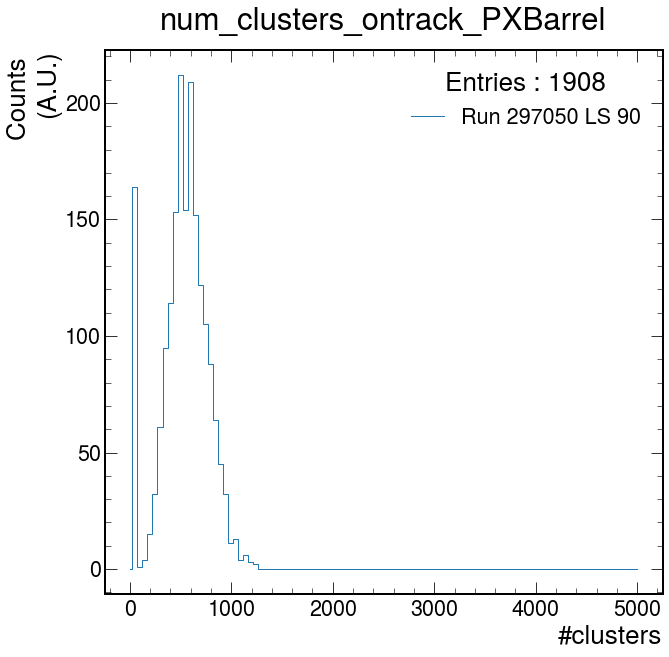

In [ ]:
i = 78 # random index corresponding of the Lumisection to view
hist_index = 8 # from 0 to 9
hname = hnames[hist_index] # first histogram type
ls = train_LS[hname][i] # some random lumisection
Run = train_RUNS[hname][i] # run that this lumisection belongs to

# choose whether to plot normalized or un-normalized histograms by passing one of the following into the make_hist function
# hvals=VALS[hname][i]
# OR
# normhist[i][0] Remember is has been transposed


make_hist(train_bin_edges[hname],train_VALS[hname][i],hname,
          label = "Run {} LS {}".format(Run,ls),
          logy = False
         )
plt.legend(title="Entries : {}".format(train_ENTRIES[hname][i]))
plt.show()

Some backround on the Charge plots:
- The plot shows the cluster charge distribution in modules placed in the inner ladders of the Pixel Barrel detector. Inner ladders are those pointing toward the Interaction point, while in outer ladders modules are oriented in the opposite direction. There is a plot of this kind for each Pixel layer.

- The distributions should look in general Landau-like, the layer one distribution (**Not used here**) being the broader.


- These histograms show charge distribution in terms of number of electrons on the different parts of the Pixel Detector of CMS
- They are understood well enough that we can use this plot to study timing and perform calibration
- If the peak of these histograms are shifted it could potentially indicate a timing issue with the detector and would require recalibration.
- Another thing to watch out for is that these histograms are expected to have nominally 1 peak. If a bump or 2nd peak shows up, it is an issue.

Below we reuse the same plotting function to overlap various plots in one figure.
This will help visualize deviations from the average behavior.

**Remember** there is 1 line for each lumisection

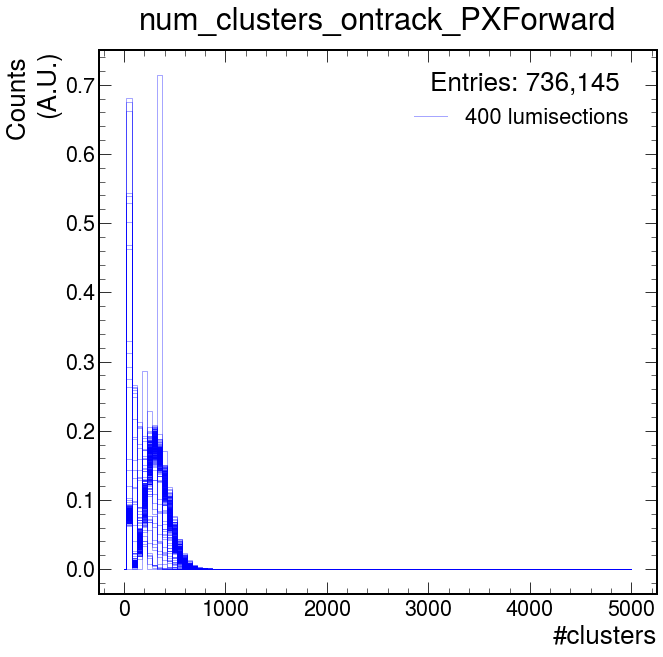

In [ ]:

i = 78 # random index corresponding of the Lumisection to view
hist_index = 9 # from 0 to 9
hname = hnames[hist_index]

entries=0

a,b = 900,1300 # any random range

# Plotting a few histograms in one figure
for i in range(a,b):
    entries += train_ENTRIES[hname][i]
    ls = train_LS[hname][i]
    Run = train_RUNS[hname][i]
    make_hist(train_bin_edges[hname],train_normhist[i][hist_index],hname,
            #   label = "Run {} LS {}".format(Run,ls),
            #   logy = True,
              color='blue',alpha=.35)
plt.legend(["{:,} lumisections ".format(b-a)],title="Entries: {:,}".format(entries),fontsize=22)

plt.show()

# Preparing the Data

Most of the work has already been done. It's just a matter of giving the familiar names to our data and splitting into training and testing sets.

In [ ]:
import math
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Input, Dense, Concatenate #,Conv1D,MaxPool1D,UpSampling1D
from tensorflow.keras.models import Model, Sequential, load_model
from keras import backend as K
from sklearn.model_selection import train_test_split
import re

In [ ]:
X_train, X_val = train_test_split(train_normhist, test_size=0.4, random_state=42)

In [ ]:
X_train.shape,X_val.shape,test_normhist.shape

((122259, 10, 102), (81507, 10, 102), (22188, 10, 102))

# Building the model

In [ ]:
nb_epoch = 500
batch_size = 200
input_dim = X_train.shape[2] #num of predictor variables

Input_layers=[Input(shape=input_dim) for i in range(10)]

conc_layer = Concatenate()(Input_layers)
encoder = Dense(64, activation="tanh")(conc_layer)
encoder = Dense(32, activation='relu')(encoder)

encoder = Dense(10, activation='relu')(encoder)

decoder = Dense(32, activation="tanh")(encoder)
decoder = Dense(64, activation="tanh")(decoder)

Output_layers=[Dense(input_dim, activation="tanh")(decoder) for i in range(10)]

autoencoder = Model(inputs=Input_layers, outputs=Output_layers)
autoencoder.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 102)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 102)]        0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 102)]        0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 102)]        0           []                               
                                                                                              

In [ ]:


checkpoint_filepath = 'checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    verbose=1,
    save_best_only=True,
    monitor='val_loss',
    mode='min')

earlystop = EarlyStopping(monitor='val_loss',
    min_delta=1e-7,
    patience=30,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=True,
)
lr =0.0001
opt = keras.optimizers.Adam(learning_rate=lr)

autoencoder.compile(loss='mse',
                    optimizer=opt)


train = autoencoder.fit(x=[X_train[:,i] for i in range(10)],
                        y=[X_train[:,i] for i in range(10)],
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=([X_val[:,i] for i in range(10)], [X_val[:,i] for i in range(10)]),
                    verbose=0,
                        callbacks= [earlystop,model_checkpoint_callback]
                    )



Epoch 00001: val_loss improved from inf to 0.00067, saving model to checkpoint
INFO:tensorflow:Assets written to: checkpoint/assets

Epoch 00002: val_loss improved from 0.00067 to 0.00035, saving model to checkpoint
INFO:tensorflow:Assets written to: checkpoint/assets

Epoch 00003: val_loss improved from 0.00035 to 0.00025, saving model to checkpoint
INFO:tensorflow:Assets written to: checkpoint/assets

Epoch 00004: val_loss improved from 0.00025 to 0.00017, saving model to checkpoint
INFO:tensorflow:Assets written to: checkpoint/assets

Epoch 00005: val_loss improved from 0.00017 to 0.00012, saving model to checkpoint
INFO:tensorflow:Assets written to: checkpoint/assets

Epoch 00006: val_loss improved from 0.00012 to 0.00010, saving model to checkpoint
INFO:tensorflow:Assets written to: checkpoint/assets

Epoch 00007: val_loss improved from 0.00010 to 0.00010, saving model to checkpoint
INFO:tensorflow:Assets written to: checkpoint/assets

Epoch 00008: val_loss improved from 0.00010 

In [ ]:
train.history.keys()

dict_keys(['loss', 'dense_5_loss', 'dense_6_loss', 'dense_7_loss', 'dense_8_loss', 'dense_9_loss', 'dense_10_loss', 'dense_11_loss', 'dense_12_loss', 'dense_13_loss', 'dense_14_loss', 'val_loss', 'val_dense_5_loss', 'val_dense_6_loss', 'val_dense_7_loss', 'val_dense_8_loss', 'val_dense_9_loss', 'val_dense_10_loss', 'val_dense_11_loss', 'val_dense_12_loss', 'val_dense_13_loss', 'val_dense_14_loss'])

plotting total `loss` and `val_loss`

In [ ]:
epochs_taken = len(train.epoch)

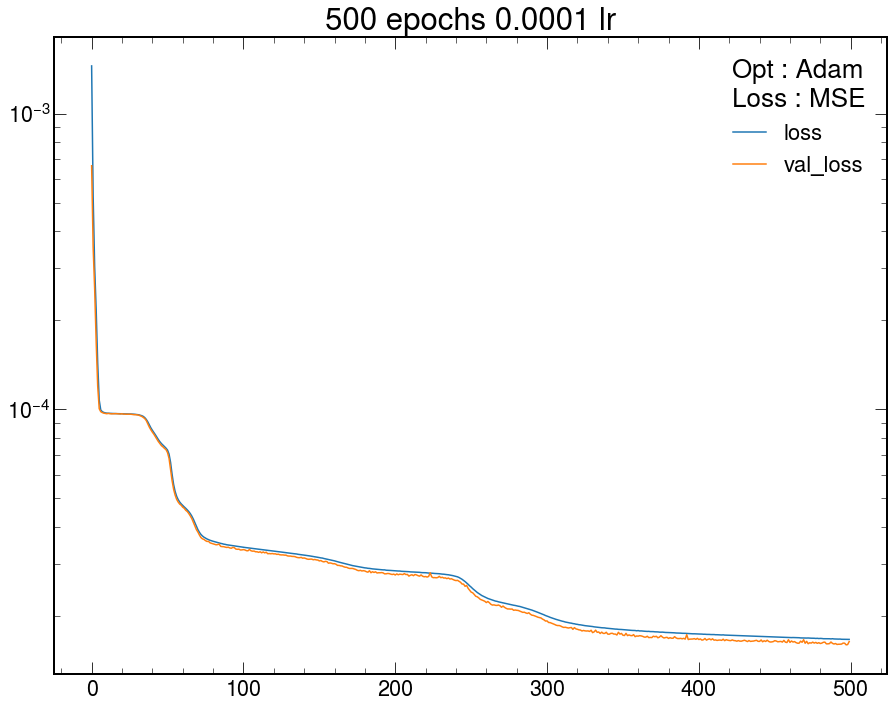

In [ ]:
plt.figure(figsize=(13,10))

plt.plot(train.history['loss'],label='loss')
plt.plot(train.history['val_loss'],label='val_loss')
plt.yscale("log")
plt.legend(fontsize=22,title="Opt : Adam\nLoss : MSE",
           shadow=True,fancybox=False,frameon=False)

plt.tight_layout()
plt.title("{} epochs {} lr".format(epochs_taken,lr))
plt.savefig("AE_{}_epochs_{}_lr_LossAndValLoss_training_perf.pdf".format(epochs_taken,lr))
plt.show()

If we want to look at the validation losses for each output 

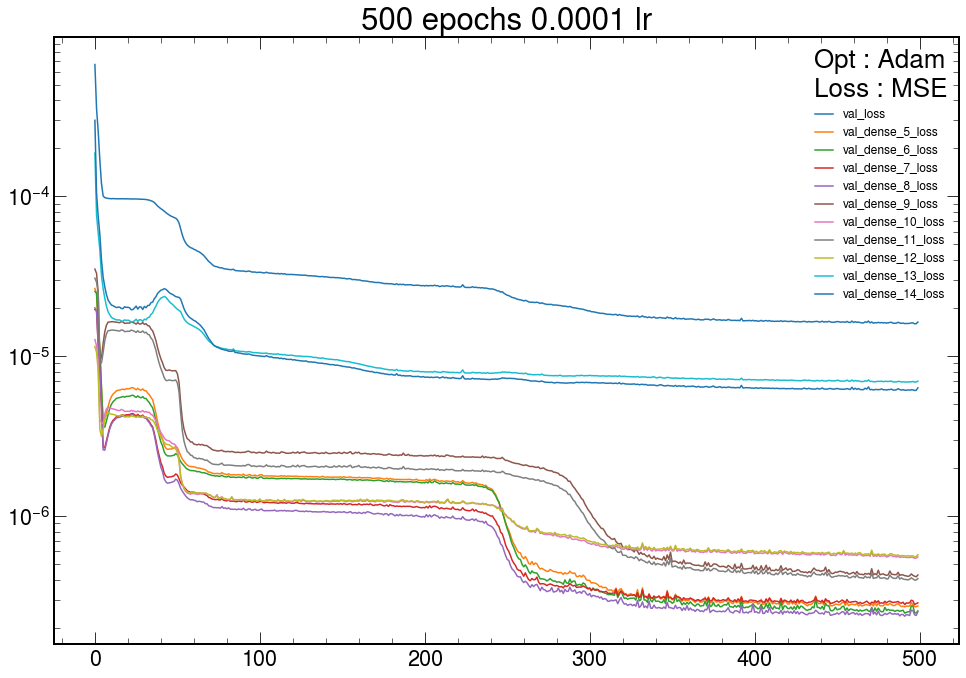

In [ ]:
plt.figure(figsize=(14,10))

for i in train.history:
    if "val" in i:
        plt.plot(train.history[i],label="{}".format(i))
plt.yscale("log")
plt.legend(fontsize=12,title="Opt : Adam\nLoss : MSE",
          )
plt.title("{} epochs {} lr".format(epochs_taken,lr))

plt.tight_layout()
plt.savefig("AE_{}_epochs_{}_lr_ValLoss_training_perf.pdf".format(epochs_taken,lr))
plt.show()

Now all the losses together 

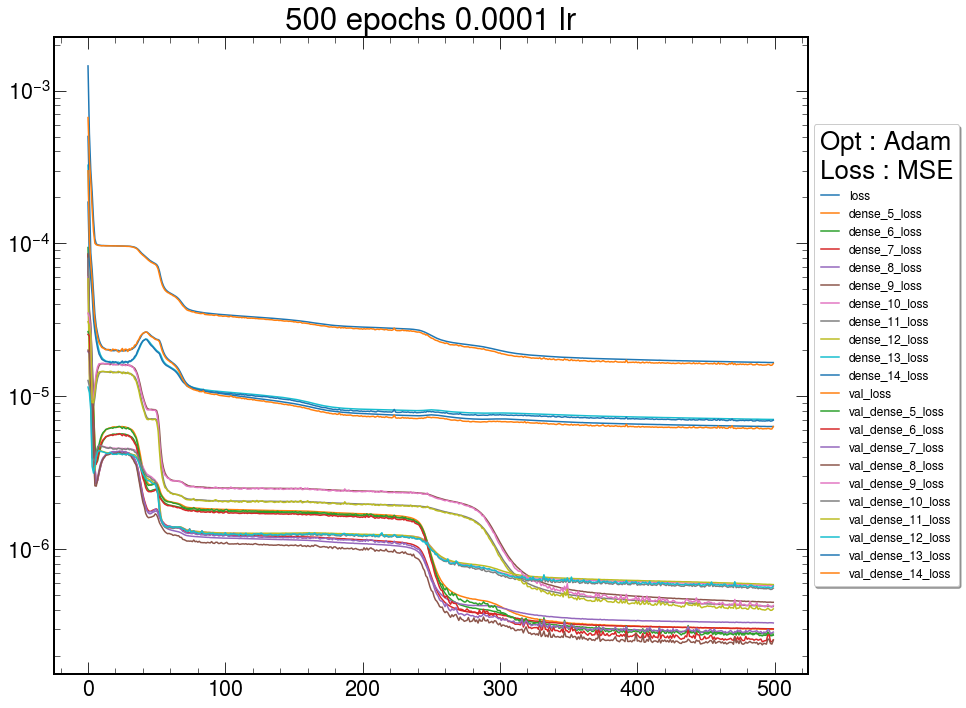

In [ ]:
plt.figure(figsize=(14,10))

for i in train.history:
    
    plt.plot(train.history[i],label="{}".format(i))
plt.yscale("log")
# plt.xscale('log')
plt.legend(fontsize=12,title="Opt : Adam\nLoss : MSE",
           loc='center left',bbox_to_anchor=(1,.5),shadow=True,fancybox=True,frameon=True)
plt.tight_layout()
plt.title("{} epochs {} lr".format(epochs_taken,lr))

plt.savefig("AE_{}_epochs_{}_lr_AllLoss_training_perf.pdf".format(epochs_taken,lr))
plt.show()

In [ ]:
# autoencoder.save("AE_{}_epochs_{}_lr.h5".format(epochs_taken,lr))

- Bad lumisections not in golden json
- Bad is usually empty.
    - Need to find those who have Tracker included and marked bad
    

In [ ]:
AE_trained = keras.models.load_model("AE_500_epochs_0.0001_lr.h5")

2021-12-09 17:53:18.768615: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


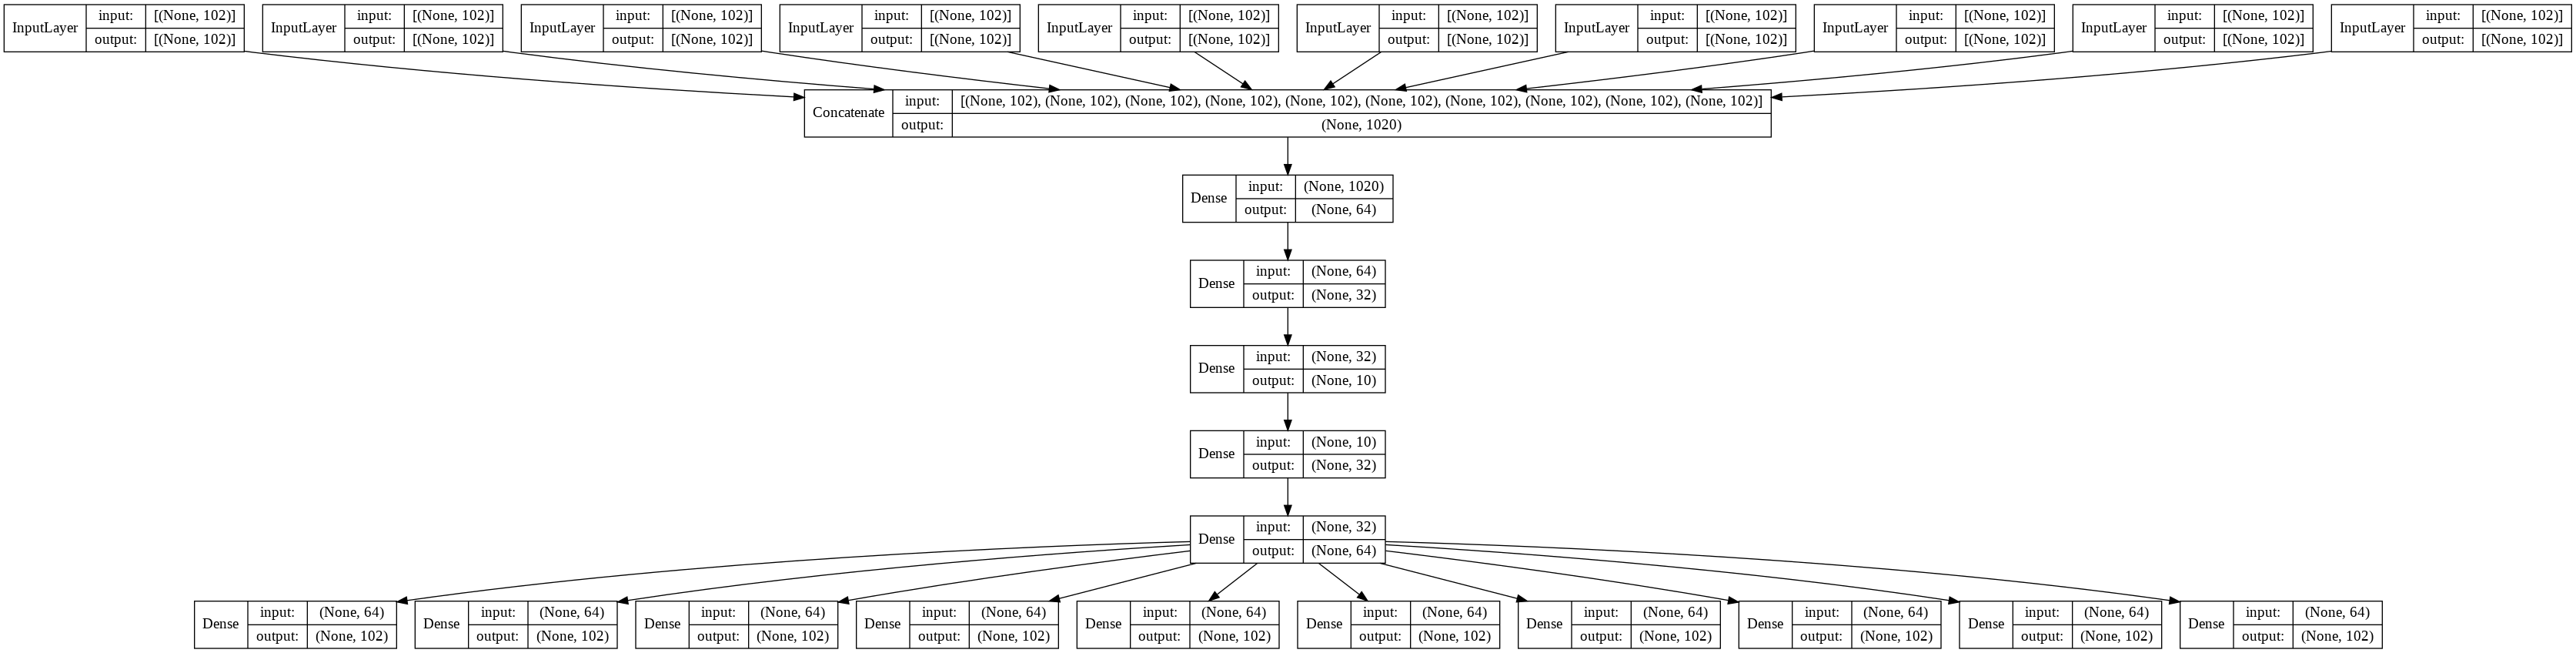

In [ ]:
tf.keras.utils.plot_model(
    AE_trained,
    to_file="modelTB.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    rankdir="TB")

# Evaluating the model

Here we look at the predictions of the AutoEnconder and compare them to the input test set

In [ ]:
X_pred=np.array(AE_trained.predict([test_normhist[:,i] for i in range(10)]))
pred=np.array(X_pred)


2021-12-09 17:56:13.810382: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [ ]:
test_normhist.shape,pred.shape

((22188, 10, 102), (10, 22188, 102))

As you can see, the shapes have shifted.
- Now the order is `(histogram type,lumisection #, elements of array)` in the `pred`.
- It is still `(lumisection #,histogram type, elements of array)` in the `X_test`.

I will plot a few lumisections of each histogram type with from the testing set in blue and the prediction in red.

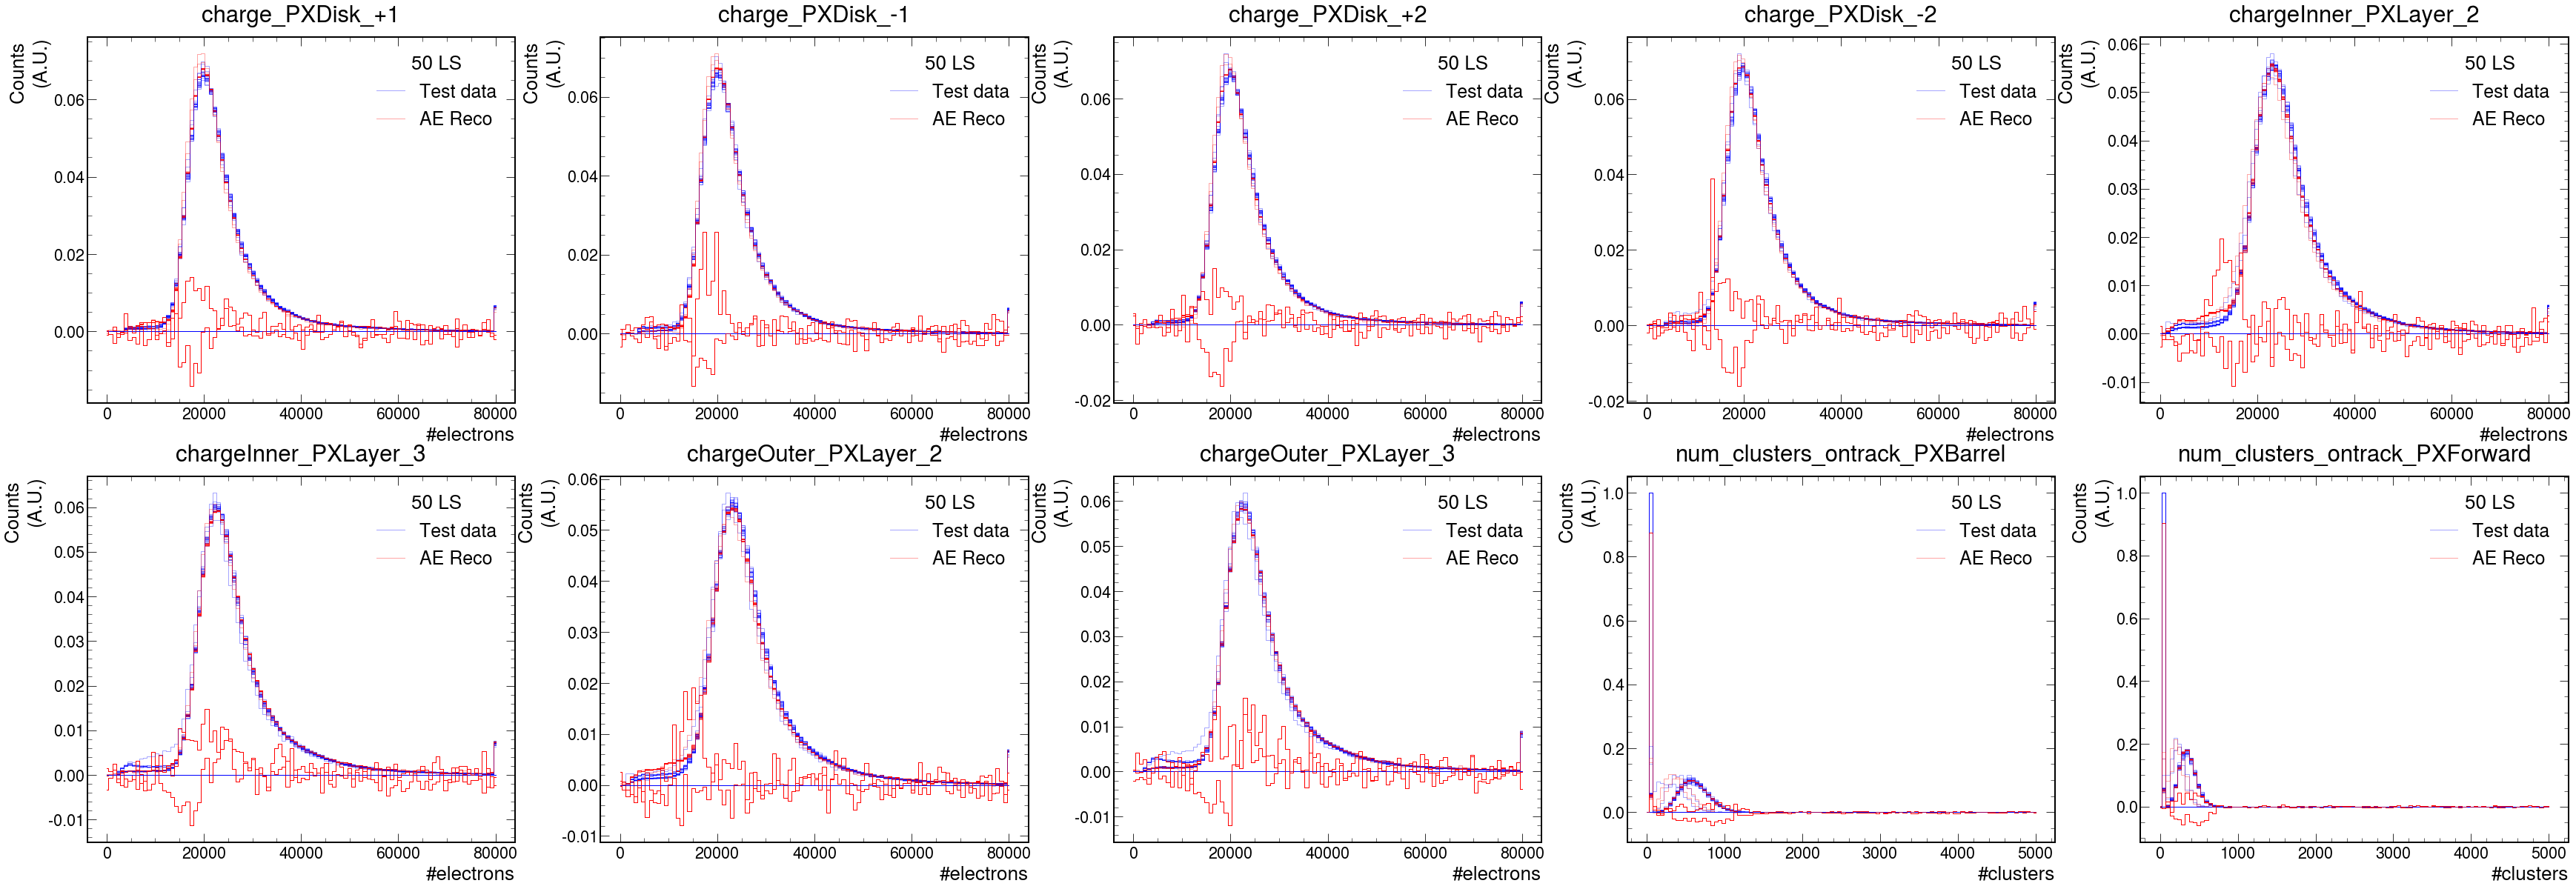

In [ ]:
a,b=50,100
hist_index=0
plt.figure(figsize=(60,20))
for j in range(1,11): 
    plt.subplot(2,5,j)
    
    for i in range(a,b):
        # ls = test_LS[hname][i]
        # Run = test_RUNS[hname][i]
       
        make_hist(test_bin_edges[hnames[hist_index]],test_normhist[i,hist_index],hnames[hist_index],
            #   label = "Test data"
            logy = False,color='blue',alpha=.35)

        make_hist(test_bin_edges[hnames[hist_index]],pred[hist_index,i],hnames[hist_index],
            #   label = "AE Reco",
              logy = False,color='red',alpha=.35)
    hist_index+=1
    plt.legend(["Test data","AE Reco"],fontsize=25,title="{} LS".format(b-a))
plt.show()

## Making Ratio Train  data / Train prediction

One way to measure the performance is to make a ratio plot of the Data/Predictions.
Let's do this for both Training and Testing sets

In [ ]:
from numba import vectorize
@vectorize # this is to speedup the calculation
def make_ratio(num,denom):
    if denom ==0:
        denom =1

    ratio = num/denom
    return ratio

Now we shift the axis of the data so that they are compatible

In [ ]:
Transposed_test=test_normhist.transpose(1,0,2)

In [ ]:
ratio=make_ratio(Transposed_test,pred)
ratio.shape

(10, 22188, 102)

In [ ]:
train_pred=np.array(AE_trained.predict([train_normhist[:,i] for i in range(10)]))
Transposed_train=train_normhist.transpose(1,0,2)
Transposed_train.shape,train_pred.shape

((10, 203766, 102), (10, 203766, 102))

In [ ]:
train_ratio=make_ratio(Transposed_train,train_pred)
train_ratio.shape

(10, 203766, 102)

## Plotting the Ratios 

Here we can see the ratios of training data/ prediction on training data.
If the model is sufficiently able to reconstruct the histograms we expect the lines to be as close to 1 as possible for the entire range.

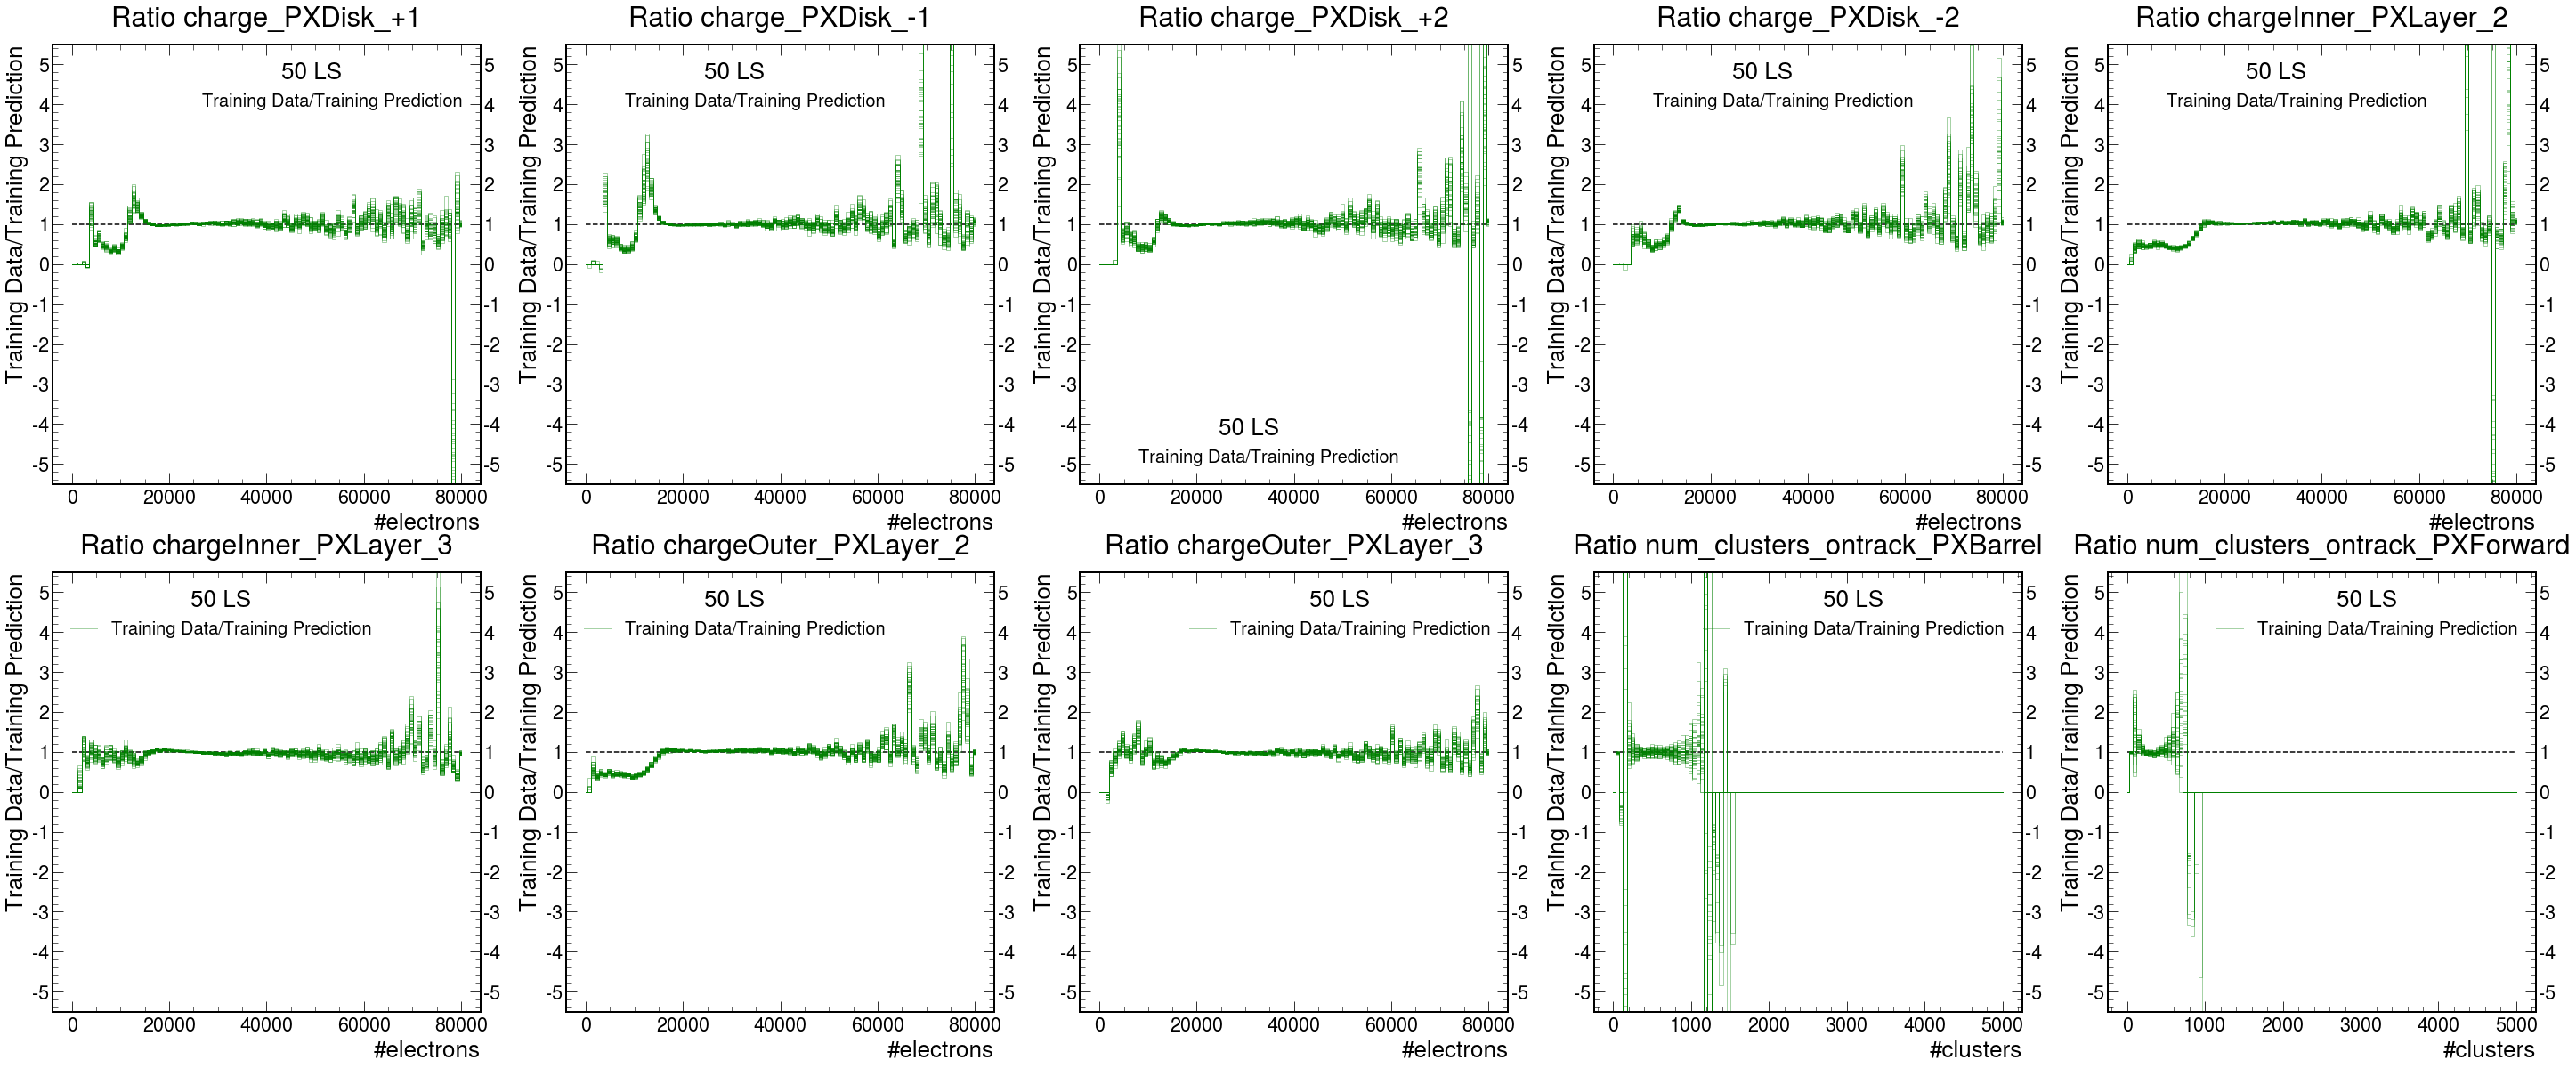

In [ ]:
hist_index=0
a,b=50,100

plt.figure(figsize=(50,20))
for j in range(1,11): 
    plt.subplot(2,5,j)
    
    for i in range(a,b):

        make_hist(train_bin_edges[hnames[hist_index]],
                            train_ratio[hist_index,i],
                            "Ratio "+hnames[hist_index],color='green',
                  alpha = .35)
    

    plt.hlines(1,0,train_bin_edges[hnames[hist_index]][-1],linestyles='dashed',colors="black")
    hist_index+=1
    plt.legend(["Training Data/Training Prediction"],fontsize=20,title="{} LS".format(b-a))
    plt.ylabel("Training Data/Training Prediction")
    plt.ylim(-5.5,5.5)
    plt.yticks(np.arange(-5,6,1))
    plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.savefig("Training Ratios.pdf")
plt.show()
    

### Plotting Ratios  Test pred/ Test

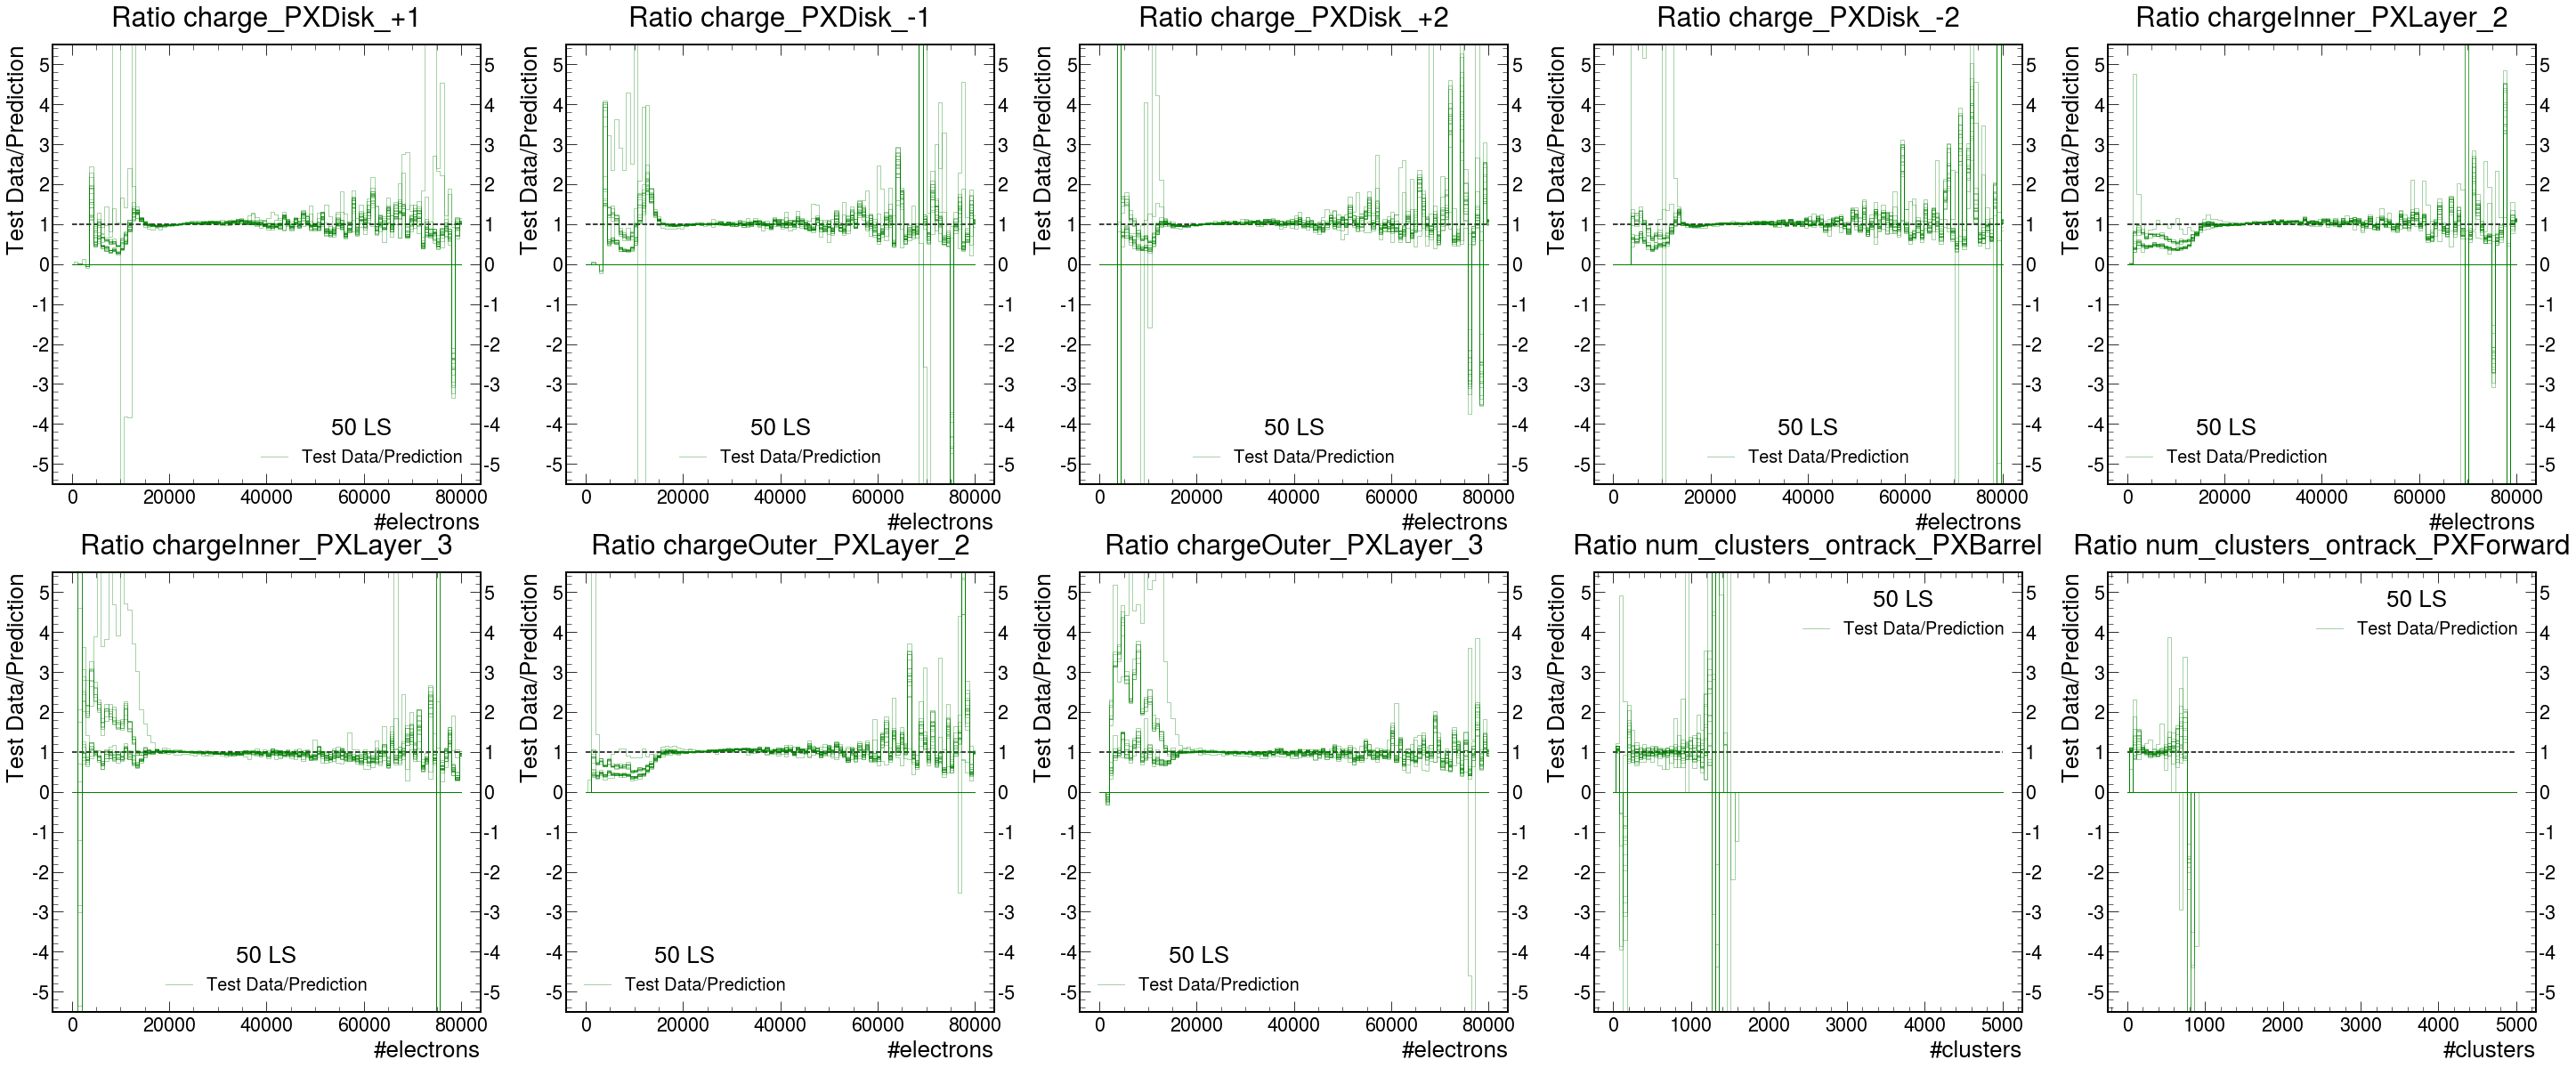

In [ ]:
hist_index=0
a,b=50,100

plt.figure(figsize=(50,20))
for j in range(1,11): 
    plt.subplot(2,5,j)
    
    for i in range(a,b):

        make_hist(test_bin_edges[hnames[hist_index]],
                            ratio[hist_index,i],
                            "Ratio "+hnames[hist_index],color='green',
                  alpha = .35)
    

    plt.hlines(1,0,test_bin_edges[hnames[hist_index]][-1],linestyles='dashed',colors="black")
    hist_index+=1
    plt.legend(["Test Data/Prediction"],fontsize=20,title="{} LS".format(b-a))
    plt.ylabel("Test Data/Prediction")
    plt.ylim(-5.5,5.5)
    plt.yticks(np.arange(-5,6,1,))
    plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.savefig("Testing Ratios.pdf")
plt.show()
    

Naturally we can show all of the available lumisections at once but we can look a the distributions of all the ratios.

### We can make a distribution of the ratios for each histogram type

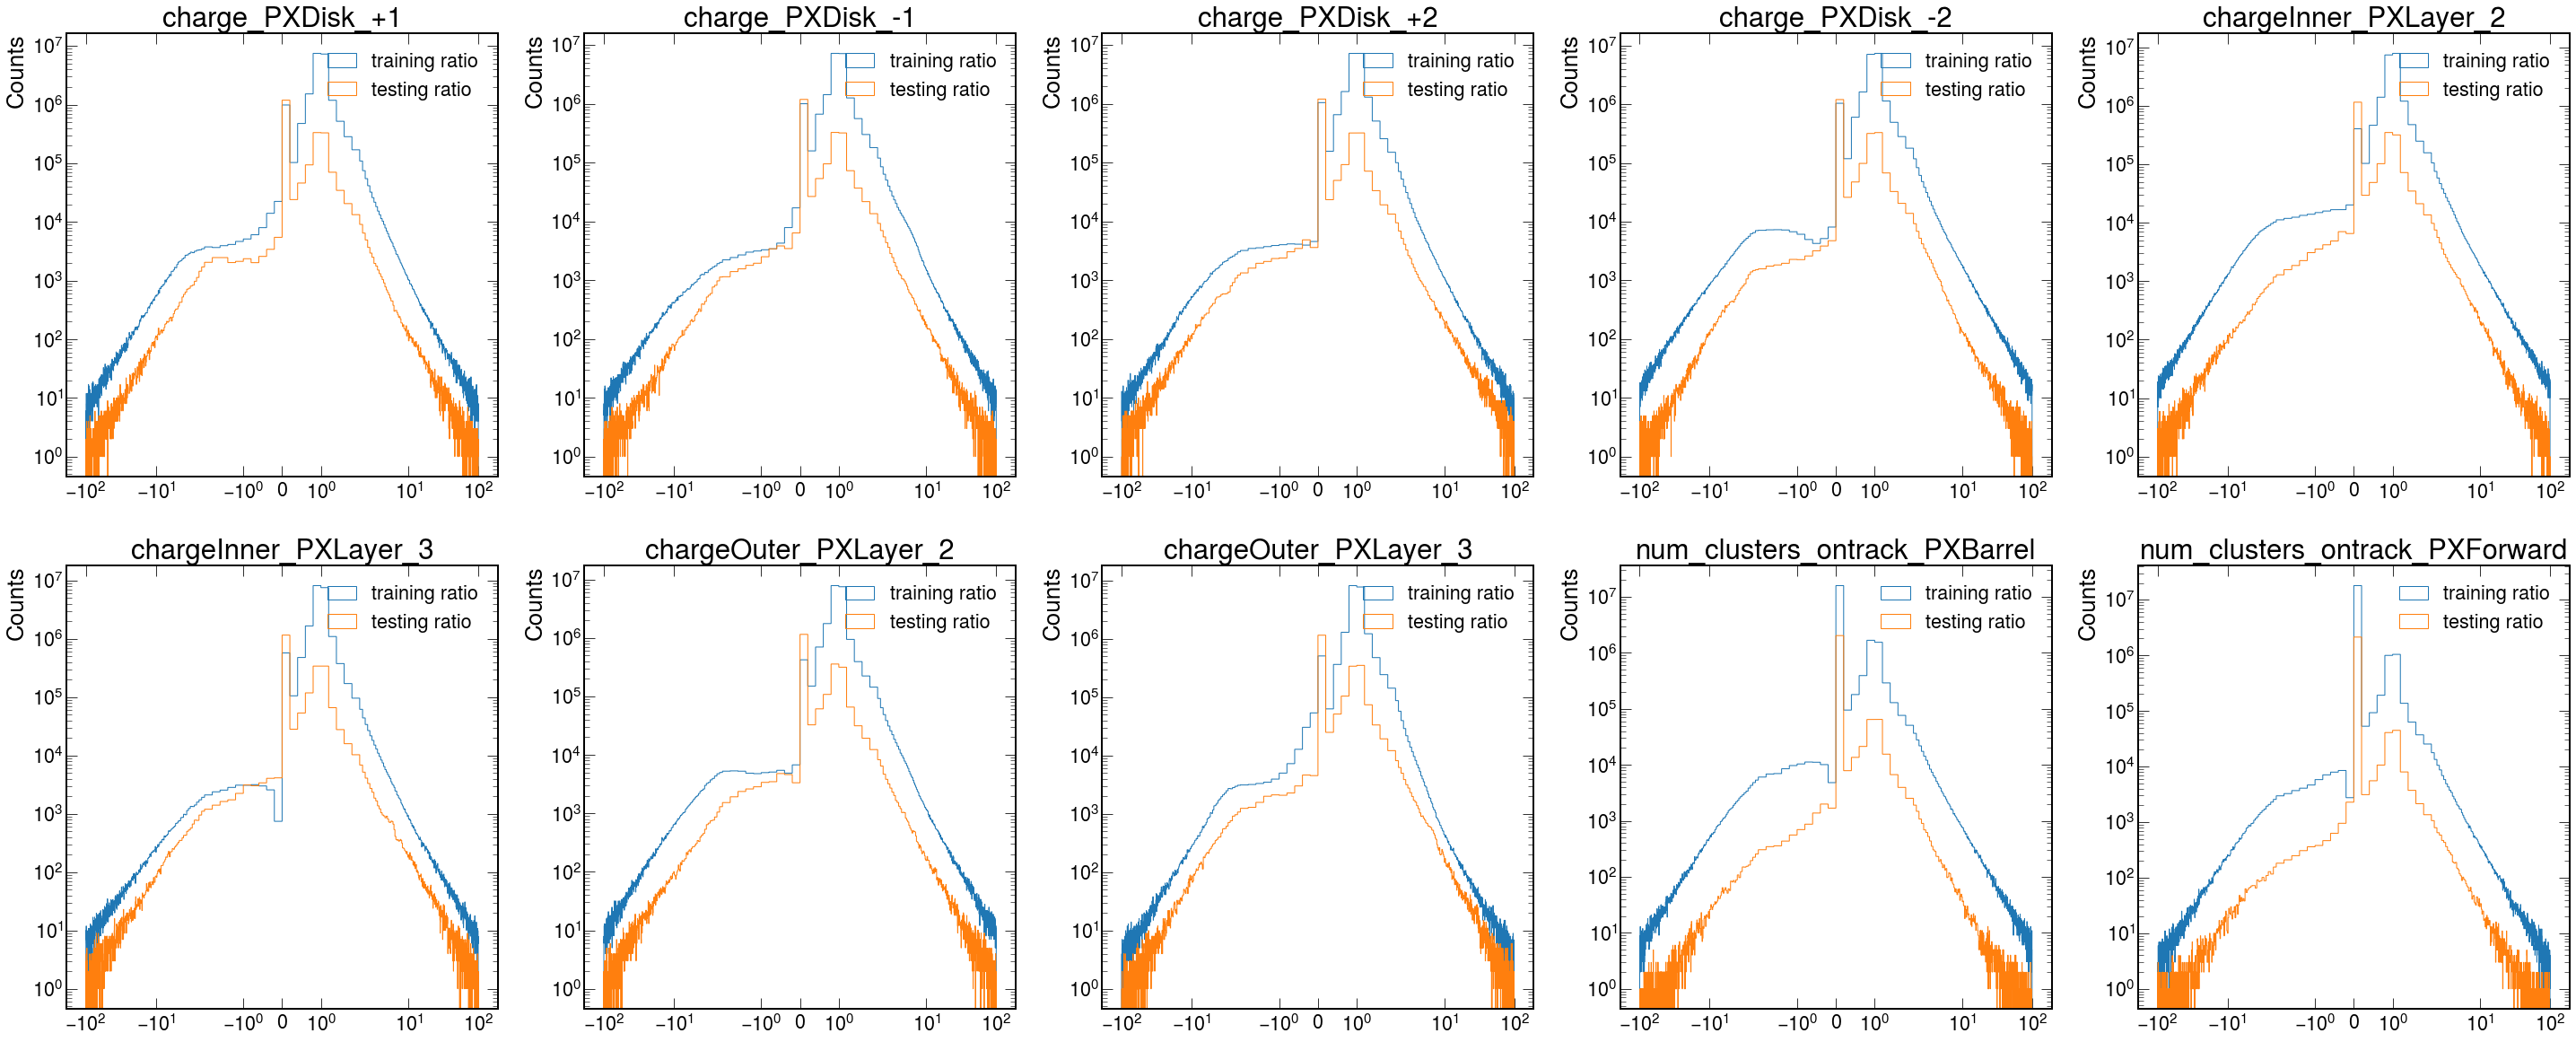

In [ ]:
hist_index=0
# a,b=0,30

plt.figure(figsize=(50,20))
for j in range(1,11): 
    plt.subplot(2,5,j)
    
    train_counts,train_bins=np.histogram(train_ratio[hist_index],bins=1000,range=(-100,100))
    counts,bins=np.histogram(ratio[hist_index],bins=1000,range=(-100,100))

    plt.hist(train_bins[:-1],train_bins, weights=train_counts,histtype="step",log=True,label='training ratio');
    plt.hist(bins[:-1],bins, weights=counts,histtype="step",log=True,label='testing ratio');
    plt.legend()
    plt.xscale("symlog")

    plt.title(hnames[hist_index])
    hist_index+=1
    plt.ylabel("Counts")

plt.savefig("Ratio histograms.pdf")
    
plt.show()

Thus we can conclude that more work needs to be done:
- The peaks around zero indicate that many of the values in the testing and training set are exactly 0.
- These could indicate low statistic runs/lumisections and posibly lumisections where the detector was off.
- Evidently there is a wide spectrum in the recontruction error but the majority does fall close to 1.